# Evaluación 01: Modelado Hidrológico 

**Clase: Modelado Hidrológico**

**Maestría académica en Gestión Integrada del Recurso Hídrico para Latinoamérica y el Caribe (GIRH-LAC)**

![](./img.png)


### Instrucciones

Dentro de la carpeta ade Datos se encuentran las series de caudales (en m$^3$/s) y las propiedades de las cuencas para cada zona de estudio.

Como parte de este proyecto se les pide que calibren y evaluén los modelos **GR4J** y **MILC** en la cuenca asignada a su **Grupo de Trabajo**.

Con esta información lo que deberan hacer es:

- Descargar la información climatológica (precipitación, temperatura media, temperatura mínima, y temperatura máxima) requerida para la simulación desde la plataforma [Climate Engine](https://climateengine.org/).

- Importar las librerias de Python necesarias en la Notebook.

- Importar los datos observados de caudal y las series climatológicas descargadas de Climate Engine.

- Realizar la calibración manual de los modelos utilizando las métricas KGE y NSE, además apoyarse de técnicas visuales, como la curva caudal-duración-frecuencia. Los datos observados de caudal se deben dividir en 70% y 30% para la calibración y validación, respectivamente.

- Realizar un análisis de incertidumbre con el Método de Monte Carlo para determinar las 10 combinaciones de parámetros que generen el mejor ajuste según el criterio KGE para cada modelo hidrológico. Se deben realizar al menos 1,000 simulaciones aleatorias para determinar la combinación de parámetros.

- Generar los scatterplots de la variación del error (KGE) con respecto al valor de los parámetros generados de forma aleatoria.

- Generar las gráficas con las bandas de incertidumbre (percentil 5 y 95) de la simulación hidrológica para cada modelo.

- Determinar cuál es el modelo que puede generar las mejores simulaciones de caudal diario en la cuenca.


### Entregables

- Archivo comprimido (.zip) de la carpeta con toda la información del proyecto.

- Presentar su proyecto con la Notebobok en no más de 20 minutos.


## Cuenca la Providencia##

**Grupo 2**

**Estudiantes:**
- Dania Zúñiga Herrera
- Esmeralda Vargas
- Katherine Urbina
- Juan Miguel


### Descripción de la cuenca: ###


In [2]:
#directorio


NameError: name 'pd' is not defined

**Importación de las librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from milc_model import *
import metrics as ms
import model_evaluation as me

from scipy.optimize import minimize

# Para activar a graficas interactivas reemplazar "inline" por "qt"
%matplotlib inline


### Modelo MILC ###

In [2]:
# Datos generales de la cuenca providencia
area    = 122   # area en km2
latitud = 9.57   # latitud aprox de la cuenca

In [9]:
# Cargar series de tiempo originales
# todas las columnas están dadas en mm
datos = pd.read_csv('C:/Users/Asus/Desktop/WPy64-3771/notebooks/Curso Python/Curso Python/Examen_01/Examen_01/Datos/Providencia/all.csv', index_col=[0], parse_dates=[0])
datos.head(4)

,prec,tmax,tmin,tmean
date,,,,
1981-01-01,0.0000,19.7441,13.1413,15.6970
1981-01-02,0.0000,19.9571,14.1375,16.5702
1981-01-03,0.0000,20.5842,14.0506,16.4550
1981-01-04,0.2095,20.3545,14.2349,16.8049


In [19]:
# convertir caudal de mm a m3/s
area = 122   # area de la cuenca en km2
qobs = datos["prec"] * area / 86.4
# caudal mensual
qobs_m = me.monthly_series(datos["prec"], method="sum")

datos.head()

,prec,tmax,tmin,tmean
date,,,,
1981-01-01,0.0000,19.7441,13.1413,15.6970
1981-01-02,0.0000,19.9571,14.1375,16.5702
1981-01-03,0.0000,20.5842,14.0506,16.4550
1981-01-04,0.2095,20.3545,14.2349,16.8049
1981-01-05,16.5019,21.3555,14.1320,17.0749


In [20]:
# Modelo MILC
modelo_MILc = MILc(area, latitud)
print(modelo_MILc)



______________MILC structure______________
Catchment properties:
    Area (km2): 122.000
    Latitude  : 9.5700
Model Parameters:
    gamma > routing coefficient (adim)               : 1.000
    w0    > Initial Water Content (adim)             : 0.500
    wmax  > Maximum Water Capacity (mm)              : 1.000
    alpha > Runoff parameter (adim)                  : 1.000
    kc    > Vegetation/Crop Coeficient (adim)        : 1.000
    m     > Drainage exponent (adim)                 : 1.000
    ks    > Satured hydraulic conductivity (mm/hr)   : 1.000
    nu    > Fraction of drainage vs interflow (adim) : 1.000



**Calibración manual**

Metricas del modelo
Calibración KGE: -0.521, NSE: -0.384
 Validación KGE: -0.559, NSE: -0.326


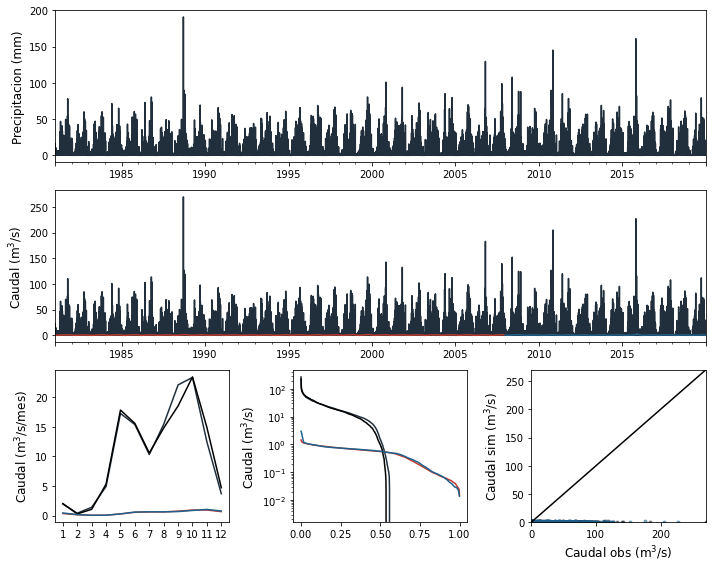

In [21]:
################# DATOS DEL USUARIO ###########################
# Definicion de parametros
gamma = 500
w0    = 0.5
wmax  = 200
alpha = 5
kc    = 1.0
ks    = 10 
m     = 2
nu    = 0.9

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1981-01-01"   # fecha inicial calibracion
fecha2 = "2007-12-31"   # fecha final calibracion, inicial validacion
fecha3 = "2019-12-31"   # fecha final validacion

################# SIMULACION CON EL MODELO ###########################
simulacion = modelo_MILc.run(datos, gamma=gamma, w0=w0, wmax=wmax, alpha=alpha, kc=kc, ks=ks, m=m, nu=nu)
qsim = simulacion.Qt

# Evaluacion del modelo
# calibracion
qobs_cal = qobs.loc[fecha1:fecha2]
qsim_cal = qsim.loc[fecha1:fecha2]
kge_cal = ms.kling_gupta_efficiency(qobs_cal, qsim_cal)
nse_cal = ms.nash_sutcliffe_efficiency(qobs_cal, qsim_cal)
# validacion
qobs_val = qobs.loc[fecha2:fecha3]
qsim_val = qsim.loc[fecha2:fecha3]
kge_val = ms.kling_gupta_efficiency(qobs_val, qsim_val)
nse_val = ms.nash_sutcliffe_efficiency(qobs_val, qsim_val)

print("Metricas del modelo")
print("Calibración KGE: {:.3f}, NSE: {:.3f}".format(kge_cal, nse_cal))
print(" Validación KGE: {:.3f}, NSE: {:.3f}".format(kge_val, nse_val))

# Graficar evaluacion
prec = datos.prec  # extraer precipitacion
fig, ax = me.plot_model_evaluation(prec, qobs, qsim, fecha1, fecha2, fecha3)

## Calibración automática

Para la calibración automática se requieren:

- Metricas de ajuste
- Definir una función objetivo o función de coste
- Un algoritmo de optimización

Las funciones objetivos deben tener las siguientes características:
- Tener como argumentos a los parámetros que queremos optimizar
- Deben poder actualizar los parámetros del modelo
- Deben poder simular el modelo dentro de la funcion
- Deben poder comparar los valores simulados con observados
- Deben arrojar el error que queremos mininizar como resultado de la funcio

In [22]:
# Ejemplo de la definición de una función objetivo

def funcion_objetivo(params):
    """
    params es el vector de entrada con los parametros que
    queremos optimizar.
    Si queremos optimizar todos los parametros necesitamos
    
    params = [gamma, w0, wmax, alpha, kc, ks, m, nu]
    
    """
    
    # Extraer los parametros del vector de entrada
    gamma = params[0]
    w0    = params[1]
    wmax  = params[2]
    alpha = params[3]
    kc    = params[4]
    ks    = params[5]
    m     = params[6]
    nu    = params[7]
    
    simulacion = modelo_MILc.run(
        datos.loc[fecha1:fecha2, :],
        gamma=gamma,
        w0=w0,
        wmax=wmax,
        alpha=alpha,
        kc=kc,
        ks=ks,
        m=m,
        nu=nu
    )
    
    # variables a ser comparadas
    ysim = simulacion.Qt
    yobs = qobs.loc[fecha1:fecha2]
    
    # calculo del error
    error = ms.kling_gupta_efficiency(yobs, ysim)
    
    # necesitamos maximizar nse, pero los algoritmos de optimizacion
    # minimizan el valor de la funcion, asi que hay que invertir el signo
    return -error 

**Problema de optimización al indicar los valores iniciales, los valóres límite y el algoritmo de optimización:**

In [23]:
# definir valores iniciales
x0 = [
    2,     # gamma
    0.5,   # w0
    800,   # wmax
    5,     # alpha
    1,     # kc
    100,    # ks
    10,    # m
    0.4,   # nu
]

# definir limites de los parametros (minimo, maximo)
bnds = [
    (1, 5),        # gamma
    (0.1, 0.9),    # w0
    (100, 1000),   # wmax
    (2, 5),       # alpha
    (0.5, 2),      # kc
    (10, 200),      # ks
    (5, 20),     # m
    (0.01, 0.99),  # nu
]

optim = minimize(
    funcion_objetivo,       # funcion objetivo
    x0,                     # valores iniciales
    method='L-BFGS-B',         # algoritmo de optimizacion ('SLSQP', 'Powell', 'TNC', 'L-BFGS-B')
    tol=1e-5,               # tolerancia de la simulacion
    bounds=bnds,            # restricciones de parametros
    options={'disp': True}  # imprimir resumen
)

print(modelo_MILc)



______________MILC structure______________
Catchment properties:
    Area (km2): 122.000
    Latitude  : 9.5700
Model Parameters:
    gamma > routing coefficient (adim)               : 1.900
    w0    > Initial Water Content (adim)             : 0.541
    wmax  > Maximum Water Capacity (mm)              : 799.990
    alpha > Runoff parameter (adim)                  : 4.996
    kc    > Vegetation/Crop Coeficient (adim)        : 0.500
    m     > Drainage exponent (adim)                 : 10.030
    ks    > Satured hydraulic conductivity (mm/hr)   : 99.969
    nu    > Fraction of drainage vs interflow (adim) : 0.010



Metricas del modelo
Calibración KGE: 0.067, NSE: 0.214
 Validación KGE: 0.077, NSE: 0.247


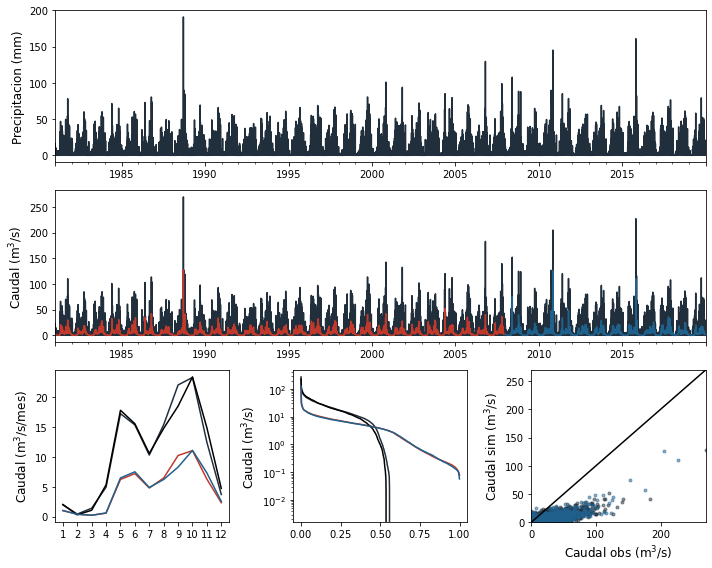

In [16]:
################# SIMULACION CON EL MODELO ###########################
simulacion = modelo_MILc.run(datos)
qsim = simulacion.Qt

# Evaluacion del modelo
# calibracion
qobs_cal = qobs.loc[fecha1:fecha2]
qsim_cal = qsim.loc[fecha1:fecha2]
kge_cal = ms.kling_gupta_efficiency(qobs_cal, qsim_cal)
nse_cal = ms.nash_sutcliffe_efficiency(qobs_cal, qsim_cal)
# validacion
qobs_val = qobs.loc[fecha2:fecha3]
qsim_val = qsim.loc[fecha2:fecha3]
kge_val = ms.kling_gupta_efficiency(qobs_val, qsim_val)
nse_val = ms.nash_sutcliffe_efficiency(qobs_val, qsim_val)

print("Metricas del modelo")
print("Calibración KGE: {:.3f}, NSE: {:.3f}".format(kge_cal, nse_cal))
print(" Validación KGE: {:.3f}, NSE: {:.3f}".format(kge_val, nse_val))

# Graficar evaluacion
prec = datos.prec  # extraer precipitacion
fig, ax = me.plot_model_evaluation(prec, qobs, qsim, fecha1, fecha2, fecha3)

**2.Análisis de Sensibilidad**

ValueError: x and y must have same first dimension, but have shapes (14244,) and (1462,)

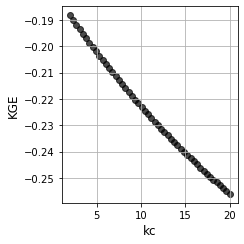

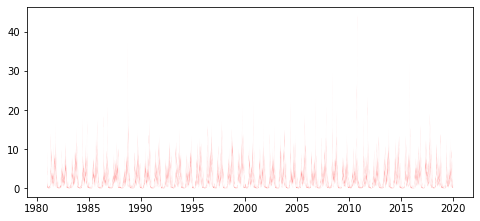

In [31]:
################# CREAR MODELO BASE ###########################
# Definicion de parametros
parametros = {
    "gamma": 5,
    "w0": 0.5,
    "wmax": 800,
    "alpha": 0.4,
    "kc": 1.0,
    "ks": 20,
    "m": 2,
    "nu": 0.8
}

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1981-01-01"   # fecha inicial calibracion
fecha2 = "2019-12-31"   # fecha final calibracion, inicial validacion

# Crear modelo con valores iniciales
modelo = MILc(area, latitud, params=parametros)


################# SIMULACIONES AL VARIAR UN PARAMETRO ###########################
vmin      = 2         # valor minimo
vmax      = 20        # valor maximo
muestras  = 50        # numero de elementos
parametro = "gamma"   # nombre del parametro que vamos a modificar


simulaciones  = []    # aqui vamos a guardar las simulaciones de caudal
errores       = []    # aqui vamos a guardar los valores del error
valores_param = np.linspace(vmin, vmax, muestras)  # este es nuestro vector de parametro que vamos a cambiar 

for valor in valores_param:
    # Simulamos unicamete para el periodo de calibracion
    # Modificamos unicamente el parametro que nos interesa
    nuevo_parametro = {parametro: valor}
    sim = modelo.run(datos.loc[fecha1:fecha2, :], **nuevo_parametro)
    qsim = sim.Qt

    # Evaluacion del modelo para el periodo de calibracion
    qobs = qobs.loc[fecha1:fecha2]
    kge  = ms.kling_gupta_efficiency(qobs, qsim)
    
    # Guardar elementos
    errores.append(kge)
    simulaciones.append(qsim)

# Crear dataframe de simulaciones
qsim = pd.concat(simulaciones, axis=1)   # unir en columnas
errores = np.array(errores)              # convertir a array

# Graficar variacion del error
fig1, ax1 = plt.subplots(figsize=(3.5, 3.5))
ax1.scatter(valores_param, errores, color="k", alpha=0.7)
ax1.set_xlabel(parametro, fontsize=12)
ax1.set_ylabel("KGE", fontsize=12)
ax1.grid(True)

fig1.tight_layout()

# Graficar series de tiempo
fig2, ax2 = plt.subplots(figsize=(8, 3.5))
qminimo = qsim.min(axis=1)  # minimo para cada renglon
qmedio  = qsim.mean(axis=1) # promedio para cada renglon
qmaximo = qsim.max(axis=1)  # maximo para cada renglon

fechas = qsim.index.to_pydatetime()
ax2.fill_between(fechas, qminimo, qmaximo, facecolor="r", alpha=0.8)
ax2.plot(fechas, qobs, color="k", label="Observado")
ax2.plot(fechas, qmedio, color="b", linewidth=0.5, label="Promedio simulado")
ax2.set_ylabel("Caudal (m3/s)", fontsize=12)
ax2.grid(True)
ax2.set_yscale("log")

fig2.tight_layout()

**3. Análisis de incertidumbre**

,gamma,alpha,kge
13,2.596278,3.939259,-0.149362
7,3.388067,2.950038,-0.154065
26,5.011880,2.503574,-0.163099
49,6.303187,2.576211,-0.169718
44,10.305775,1.490396,-0.175355
9,11.615551,1.555186,-0.179451
3,10.529995,1.835988,-0.180159
38,14.641751,1.412830,-0.182431
48,11.000980,2.255448,-0.183726
31,15.949031,1.400599,-0.183986


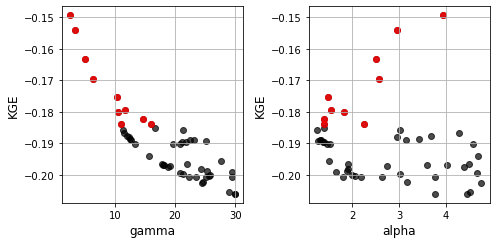

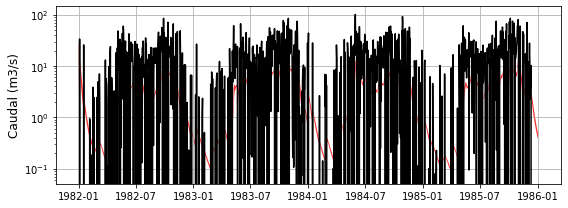

In [25]:
################# CREAR MODELO BASE ###########################
# Definicion de parametros
parametros_iniciales = {
    "gamma": 5,
    "w0": 0.5,
    "wmax": 800,
    "alpha": 0.4,
    "kc": 1.0,
    "ks": 20,
    "m": 2,
    "nu": 0.4
}

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1982-01-01"   # fecha inicial calibracion
fecha2 = "1986-01-01"   # fecha final calibracion, inicial validacion

# Crear modelo con valores iniciales
modelo = MILc(area, latitud, params=parametros_iniciales)


################# SIMULACIONES AL VARIAR UN PARAMETRO ###########################
muestras   = 50         # numero de elementos
mejores_resultsdos = 10  # numero de los mejores resultados a mostrar
# diccionario con los parametros que queremos modificar
# indicar parametro: (vmin, vmax)
parametros = {
    "gamma": (2, 30),
    "alpha": (1, 5),
}


npar = len(parametros) # numero de parametros que seran modificados
simulaciones  = []     # aqui vamos a guardar las simulaciones de caudal
errores       = []     # aqui vamos a guardar los valores del error

# Crear matrices vacias para guardar los parametros generados
# valores de parametros para graficar
valores_aleatorios = pd.DataFrame(
    np.zeros((muestras, npar)),
    columns=parametros.keys()
)
# valores de parametros durante iteracion
nuevo_parametro = {}
for key in parametros.keys():
    vmin = parametros[key][0]
    vmax = parametros[key][1]
    valores_aleatorios.loc[:, key] = np.random.uniform(vmin, vmax, muestras)
    
    nuevo_parametro[key] = 0.0

    
for i in range(muestras):
    # Simulamos unicamete para el periodo de calibracion
    for key in parametros.keys():
        # guardar valores para simular
        nuevo_parametro[key] = valores_aleatorios.loc[i, key]
    
    # Simulamos unicamete para el periodo de calibracion
    sim = modelo.run(datos.loc[fecha1:fecha2, :], **nuevo_parametro)
    qsim = sim.Qt

    # Evaluacion del modelo para el periodo de calibracion
    qobs = qobs.loc[fecha1:fecha2]
    kge  = ms.kling_gupta_efficiency(qobs, qsim)
    
    # Guardar elementos
    errores.append(kge)
    simulaciones.append(qsim)

# Crear dataframe de simulaciones
qsim = pd.concat(simulaciones, axis=1)   # unir en columnas
valores_aleatorios["kge"] = np.array(errores) # agregar columna con el error
# ordenar parametros de mayor a menor kge
parametros_ordenados = valores_aleatorios.sort_values(by="kge", ascending=False)
parametros_ordenados = parametros_ordenados.iloc[:mejores_resultsdos, :]

# Graficar variacion del error
ancho = 3.5 * npar
fig, ax = plt.subplots(ncols=npar, figsize=(ancho, 3.5))
ax = ax.flatten()
for i in range(npar):
    parametro = valores_aleatorios.columns[i]
    # graficar todos los parametros
    ax[i].scatter(
        valores_aleatorios.loc[:, parametro],   # valores en x
        valores_aleatorios.loc[:, "kge"],       # valores en y
        color="k",                              # color de puntos
        alpha=0.7                               # transparencia
    )
    # graficar parametros de mejor ajuste
    ax[i].scatter(
        parametros_ordenados.loc[:, parametro], # valores en x
        parametros_ordenados.loc[:, "kge"],     # valores en y
        color="r",                              # color de puntos
        alpha=0.8                               # transparencia
    )
    
    ax[i].set_xlabel(parametro, fontsize=12)
    ax[i].set_ylabel("KGE", fontsize=12)
    ax[i].grid(True)

fig.tight_layout()    

# Graficar series de tiempo
fig2, ax2 = plt.subplots(figsize=(8, 3))
qminimo = qsim.min(axis=1)  # minimo para cada renglon
qmedio  = qsim.mean(axis=1) # promedio para cada renglon
qmaximo = qsim.max(axis=1)  # maximo para cada renglon

fechas = qsim.index.to_pydatetime()
ax2.fill_between(fechas, qminimo, qmaximo, facecolor="r", alpha=0.8)
ax2.plot(fechas, qobs, color="k", label="Observado")
#ax2.plot(fechas, qmedio, color="b", linewidth=0.5, label="Promedio simulado")
ax2.set_ylabel("Caudal (m3/s)", fontsize=12)
ax2.set_yscale("log")
ax2.grid(True)
fig2.tight_layout()

# Mostrar parametros de mejor ajuste
parametros_ordenados

**Generar los scatterplots de la variación del error (KGE) con respecto al valor de los parámetros generados de forma aleatoria**


**Generar las gráficas con las bandas de incertidumbre (percentil 5 y 95) de la simulación hidrológica para cada model**

### Modelo GR4J ###